In [3]:
# Dependencies and Set Up

import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from pathlib import Path
import seaborn as sns

In [4]:
# File to Load 
apple_data_load = Path("Resources/data_for_weka_aw.csv")
fitbit_data_load = Path("Resources/data_for_weka_fb.csv")

In [5]:
# Read Data File and store into Pandas DataFrames
apple_data = pd.read_csv(apple_data_load)
fitbit_data = pd.read_csv(fitbit_data_load)
#fitbit_data
apple_data

,Unnamed: 0,age,gender,height,weight,Applewatch.Steps_LE,Applewatch.Heart_LE,Applewatch.Calories_LE,Applewatch.Distance_LE,EntropyApplewatchHeartPerDay_LE,EntropyApplewatchStepsPerDay_LE,RestingApplewatchHeartrate_LE,CorrelationApplewatchHeartrateSteps_LE,NormalizedApplewatchHeartrate_LE,ApplewatchIntensity_LE,SDNormalizedApplewatchHR_LE,ApplewatchStepsXDistance_LE,activity_trimmed
0,1,20,1,168.0,65.4,10.771429,78.531302,0.344533,0.008327,6.221612,6.116349,59.000000,1.000000,19.531302,0.138520,1.000000,0.089692,Lying
1,2,20,1,168.0,65.4,11.475325,78.453390,3.287625,0.008896,6.221612,6.116349,59.000000,1.000000,19.453390,0.137967,1.000000,0.102088,Lying
2,3,20,1,168.0,65.4,12.179221,78.540825,9.484000,0.009466,6.221612,6.116349,59.000000,1.000000,19.540825,0.138587,1.000000,0.115287,Lying
3,4,20,1,168.0,65.4,12.883117,78.628260,10.154556,0.010035,6.221612,6.116349,59.000000,1.000000,19.628260,0.139208,1.000000,0.129286,Lying
4,5,20,1,168.0,65.4,13.587013,78.715695,10.825111,0.010605,6.221612,6.116349,59.000000,0.982816,19.715695,0.139828,0.241567,0.144088,Lying
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3651,3666,46,0,157.5,71.4,163.000000,157.250000,0.701500,0.075200,6.162427,5.655310,79.421795,1.000000,77.828205,0.822898,7.270204,12.257600,Running 7 METs
3652,3667,46,0,157.5,71.4,6.666667,157.307692,0.701500,0.075475,6.162427,5.655310,79.421795,1.000000,77.885897,0.823508,1.000000,0.503167,Running 7 METs
3653,3668,46,0,157.5,71.4,6.750000,156.250000,0.732000,0.075695,6.162427,5.655310,79.421795,1.000000,76.828205,0.812325,1.000000,0.510941,Running 7 METs
3654,3669,46,0,157.5,71.4,6.791667,158.090909,0.612500,0.077270,6.162427,5.655310,79.421795,1.000000,78.669114,0.831789,1.000000,0.524792,Running 7 METs


In [6]:
# Colum name for each data frame
apple_data['device']= "Apple Watch"
fitbit_data['device']= "FitBit Watch"

In [7]:
# Combine the data into a single dataset.
wearable_data_com = pd.concat([apple_data, fitbit_data])
wearable_data_com

,Unnamed: 0,age,gender,height,weight,Applewatch.Steps_LE,Applewatch.Heart_LE,Applewatch.Calories_LE,Applewatch.Distance_LE,EntropyApplewatchHeartPerDay_LE,...,Fitbit.Calories_LE,Fitbit.Distance_LE,EntropyFitbitHeartPerDay_LE,EntropyFitbitStepsPerDay_LE,RestingFitbitHeartrate_LE,CorrelationFitbitHeartrateSteps_LE,NormalizedFitbitHeartrate_LE,FitbitIntensity_LE,SDNormalizedFitbitHR_LE,FitbitStepsXDistance_LE
0,1,20,1,168.0,65.4,10.771429,78.531302,0.344533,0.008327,6.221612,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,20,1,168.0,65.4,11.475325,78.453390,3.287625,0.008896,6.221612,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,20,1,168.0,65.4,12.179221,78.540825,9.484000,0.009466,6.221612,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,20,1,168.0,65.4,12.883117,78.628260,10.154556,0.010035,6.221612,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,20,1,168.0,65.4,13.587013,78.715695,10.825111,0.010605,6.221612,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2603,3666,46,0,157.5,71.4,NaN,NaN,NaN,NaN,NaN,...,20.5,1.0,0.0,0.0,35.0,1.0,0.0,0.0,0.0,1.0
2604,3667,46,0,157.5,71.4,NaN,NaN,NaN,NaN,NaN,...,20.5,1.0,0.0,0.0,35.0,1.0,0.0,0.0,1.0,1.0
2605,3668,46,0,157.5,71.4,NaN,NaN,NaN,NaN,NaN,...,20.5,1.0,0.0,0.0,35.0,1.0,0.0,0.0,1.0,1.0
2606,3669,46,0,157.5,71.4,NaN,NaN,NaN,NaN,NaN,...,20.5,1.0,0.0,0.0,35.0,1.0,0.0,0.0,1.0,1.0


In [8]:
# change colum names
wearable_data_com = wearable_data_com.rename(columns={"Applewatch.Steps_LE": "Steps_Apple"})
wearable_data_com = wearable_data_com.rename(columns={"Applewatch.Distance_LE": "Distance_Apple"})
wearable_data_com = wearable_data_com.rename(columns={"Fitbit.Steps_LE": "Steps_FitB"})
wearable_data_com = wearable_data_com.rename(columns={"Fitbit.Distance_LE": "Distance_FitB"})
wearable_data_com = wearable_data_com.rename(columns={"activity_trimmed": "activity"})
wearable_data_com

,Unnamed: 0,age,gender,height,weight,Steps_Apple,Applewatch.Heart_LE,Applewatch.Calories_LE,Distance_Apple,EntropyApplewatchHeartPerDay_LE,...,Fitbit.Calories_LE,Distance_FitB,EntropyFitbitHeartPerDay_LE,EntropyFitbitStepsPerDay_LE,RestingFitbitHeartrate_LE,CorrelationFitbitHeartrateSteps_LE,NormalizedFitbitHeartrate_LE,FitbitIntensity_LE,SDNormalizedFitbitHR_LE,FitbitStepsXDistance_LE
0,1,20,1,168.0,65.4,10.771429,78.531302,0.344533,0.008327,6.221612,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,20,1,168.0,65.4,11.475325,78.453390,3.287625,0.008896,6.221612,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,20,1,168.0,65.4,12.179221,78.540825,9.484000,0.009466,6.221612,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,20,1,168.0,65.4,12.883117,78.628260,10.154556,0.010035,6.221612,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,20,1,168.0,65.4,13.587013,78.715695,10.825111,0.010605,6.221612,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2603,3666,46,0,157.5,71.4,NaN,NaN,NaN,NaN,NaN,...,20.5,1.0,0.0,0.0,35.0,1.0,0.0,0.0,0.0,1.0
2604,3667,46,0,157.5,71.4,NaN,NaN,NaN,NaN,NaN,...,20.5,1.0,0.0,0.0,35.0,1.0,0.0,0.0,1.0,1.0
2605,3668,46,0,157.5,71.4,NaN,NaN,NaN,NaN,NaN,...,20.5,1.0,0.0,0.0,35.0,1.0,0.0,0.0,1.0,1.0
2606,3669,46,0,157.5,71.4,NaN,NaN,NaN,NaN,NaN,...,20.5,1.0,0.0,0.0,35.0,1.0,0.0,0.0,1.0,1.0


In [9]:
# Group by device and activity to count the ocurrences
activity_counts = wearable_data_com.groupby(["device", "activity"]).size().unstack()

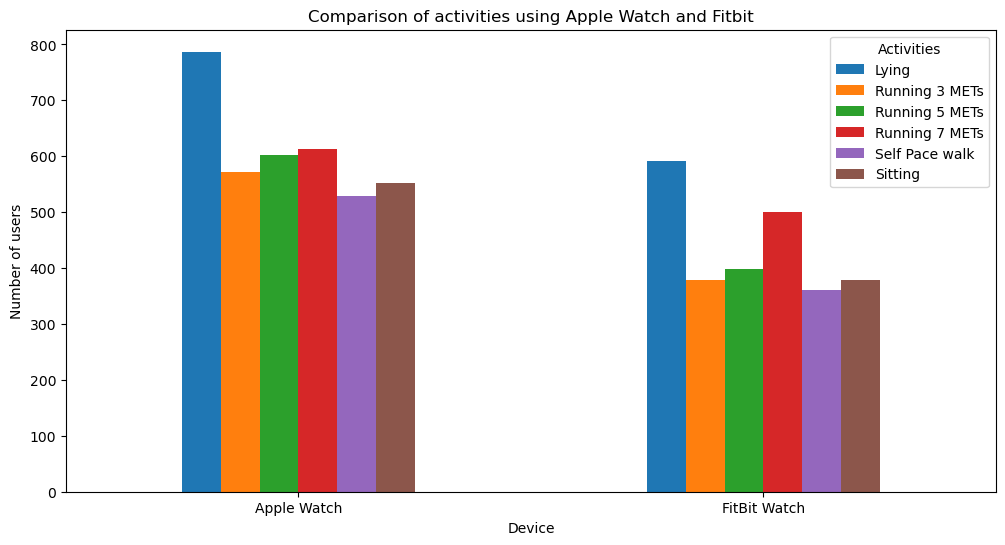

In [10]:
#plot the comparison 
activity_counts.plot(kind="bar", figsize=(12, 6))
plt.title ("Comparison of activities using Apple Watch and Fitbit")
plt.xlabel("Device")
plt.ylabel("Number of users")
plt.xticks(rotation=0)
plt.legend(title="Activities")
plt.show()

In [11]:
### In this part of the project we want to do a general comparision of users by devices in the diferent activities.
    # As we can see the numbers in the different activities. People use more apple watch in general in the different activites... now lets search something else


In [12]:
# make sure that colums are numerical
wearable_data_com["Distance_Apple"] = pd.to_numeric(wearable_data_com["Distance_Apple"], errors="coerce")
wearable_data_com["Steps_Apple"] = pd.to_numeric(wearable_data_com["Steps_Apple"], errors="coerce")
wearable_data_com["Distance_FitB"] = pd.to_numeric(wearable_data_com["Distance_FitB"], errors="coerce")
wearable_data_com["Steps_FitB"] = pd.to_numeric(wearable_data_com["Steps_FitB"], errors="coerce")

In [13]:
# We gonna identify the amount of use. Withe calculation of steps and distance.


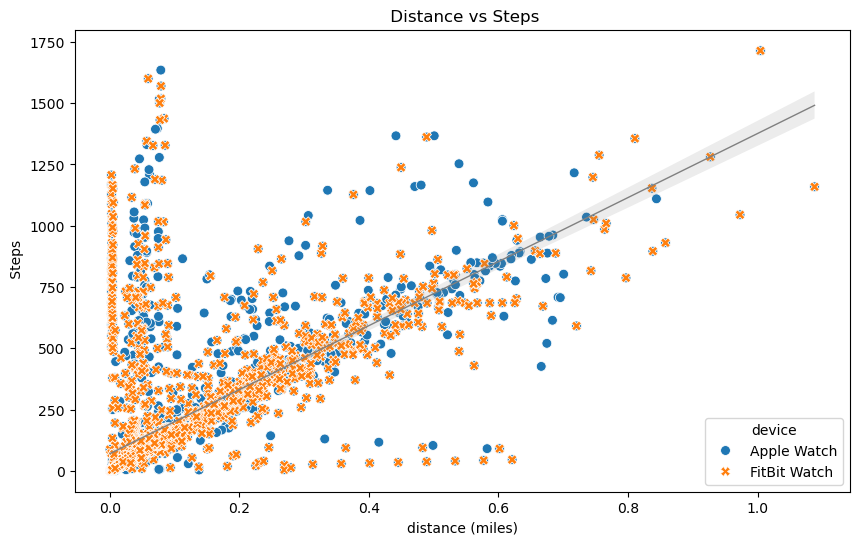

In [14]:
# create a scatter plot
plt.figure(figsize=(10,6))
sns.scatterplot(data=wearable_data_com, x="Distance_Apple", y="Steps_Apple", hue="device", style="device", s=50)
sns.regplot(data=wearable_data_com, x="Distance_Apple", y="Steps_Apple", scatter=False, color="gray", line_kws={"linewidth":1})

plt.title(" Distance vs Steps")
plt.xlabel("distance (miles)")
plt.ylabel(" Steps")
plt.show()

In [15]:
# Correlation Between Distance and steps
correlation_apple = wearable_data_com[["Distance_Apple", "Steps_Apple"]].corr()
correlation_FitB = wearable_data_com[["Distance_FitB", "Steps_FitB"]].corr()
# Average steps and Distance in apple
avg_steps_apple = wearable_data_com["Steps_Apple"].mean()
avg_distance_apple = wearable_data_com["Distance_Apple"].mean()

# Average steps and Distance in FitB
avg_steps_FitB = wearable_data_com["Steps_FitB"].mean()
avg_distance_FitB = wearable_data_com["Distance_FitB"].mean()

print([correlation_apple], [avg_steps_apple], [avg_distance_apple])
print([correlation_FitB], [avg_steps_FitB], [avg_distance_FitB])

[                Distance_Apple  Steps_Apple
Distance_Apple        1.000000     0.663788
Steps_Apple           0.663788     1.000000] [180.24642073557047] [0.08423558819462892]
[               Distance_FitB  Steps_FitB
Distance_FitB       1.000000    0.601578
Steps_FitB          0.601578    1.000000] [10.474360268001291] [33.105505327736516]


In [16]:
## in this last analisis that we are looking to identify how often use the watch we foound:
 # The correlation between ditance and steps in both cases are positives and are above 0,6. Also apple devices show a better correlation.
 # the Numbers of steps per person it is much biiger in apple users but in the other hand amount of distance is more common
    # that FitBit Users get further while use.

In [17]:
# Path to file
aw_fb_data_path = "Resources/aw_fb_data.csv"
# Read the data
Apple_fitbit = pd.read_csv(aw_fb_data_path)
Apple_fitbit.head()

,Unnamed: 0,X1,age,gender,height,weight,steps,hear_rate,calories,distance,entropy_heart,entropy_setps,resting_heart,corr_heart_steps,norm_heart,intensity_karvonen,sd_norm_heart,steps_times_distance,device,activity
0,1,1,20,1,168.0,65.4,10.771429,78.531302,0.344533,0.008327,6.221612,6.116349,59.0,1.000000,19.531302,0.138520,1.000000,0.089692,apple watch,Lying
1,2,2,20,1,168.0,65.4,11.475325,78.453390,3.287625,0.008896,6.221612,6.116349,59.0,1.000000,19.453390,0.137967,1.000000,0.102088,apple watch,Lying
2,3,3,20,1,168.0,65.4,12.179221,78.540825,9.484000,0.009466,6.221612,6.116349,59.0,1.000000,19.540825,0.138587,1.000000,0.115287,apple watch,Lying
3,4,4,20,1,168.0,65.4,12.883117,78.628260,10.154556,0.010035,6.221612,6.116349,59.0,1.000000,19.628260,0.139208,1.000000,0.129286,apple watch,Lying
4,5,5,20,1,168.0,65.4,13.587013,78.715695,10.825111,0.010605,6.221612,6.116349,59.0,0.982816,19.715695,0.139828,0.241567,0.144088,apple watch,Lying


In [69]:
# Type of gender wears device
gender_device = Apple_fitbit.set_index(["gender"])["device"]
gender_map = {0: 'Female', 1: 'Male'}
gender_device.index = gender_device.index.map(gender_map)
gender_device_df = gender_device.reset_index()
gender_device_df.columns = ['Gender', 'Device']
gender_device_df.head()

,Gender,Device
0,Male,apple watch
1,Male,apple watch
2,Male,apple watch
3,Male,apple watch
4,Male,apple watch


In [71]:
# Counts of Gender & Device
gender_device_counts = gender_device_df.groupby(['Gender', 'Device']).size().reset_index(name='Count')
gender_device_counts.head

<bound method NDFrame.head of    Gender       Device  Count
0  Female  apple watch   1925
1  Female       fitbit   1354
2    Male  apple watch   1731
3    Male       fitbit   1254>

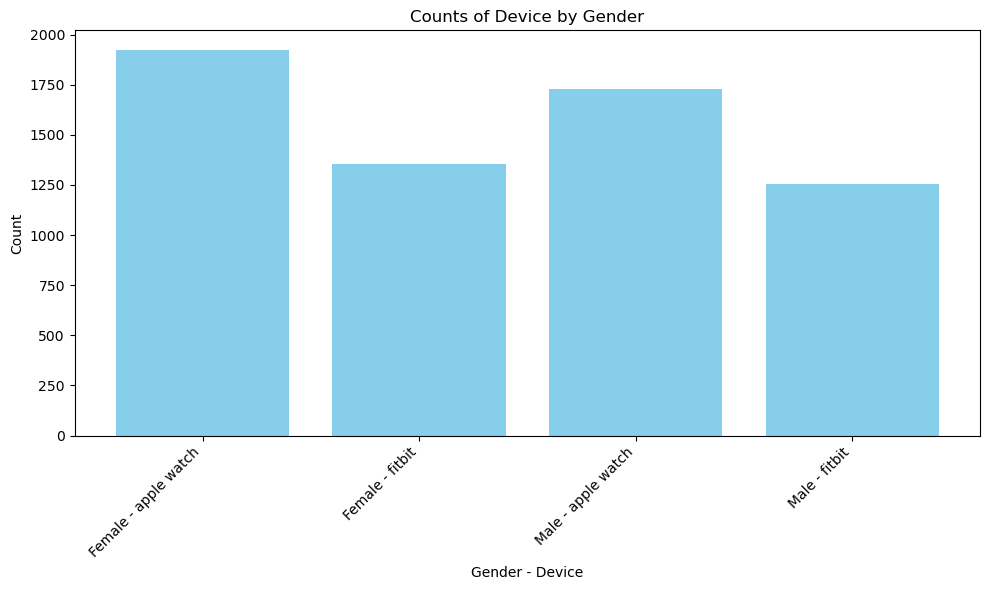

In [73]:
# Plot the bar graph
plt.figure(figsize=(10, 6))
plt.bar(gender_device_counts['Gender'] + ' - ' + gender_device_counts['Device'], gender_device_counts['Count'], color='skyblue')
plt.xlabel('Gender - Device')
plt.ylabel('Count')
plt.title('Counts of Device by Gender')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Show the plot
plt.show()

In [79]:
# Bar graph Analysis: 
#By looking at the graph we can see that both genders prefer the apple watch over the fitbit, 
#allowing us to see that in a consumers outlook the apple watch is the way to go for both genders

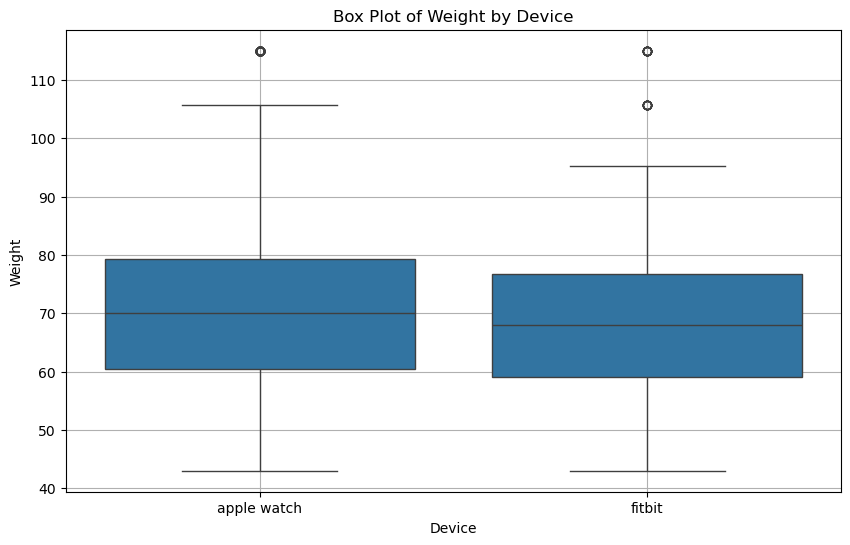

In [81]:
# Distributed weight between devices
Weight_device_df = Apple_fitbit[['weight', 'device']]
mean_weight_device_df = Weight_device_df.groupby('device')['weight'].mean().reset_index()

#plot box plot 
plt.figure(figsize=(10, 6))
sns.boxplot(x='device', y='weight', data=Weight_device_df)
plt.xlabel('Device')
plt.ylabel('Weight')
plt.title('Box Plot of Weight by Device')
plt.grid(True)
plt.show()

In [85]:
# Box plot analysis:
# The box plots help us look at the distributed weight of the people who partook in this data collection. We can tell that apple watch users 
#have more of a dispersed group. We can imply that while both are close apple watch attracts more of a diversed group of people than fitbit does. 

C:\Users\Daniel\AppData\Local\Temp\ipykernel_30300\1357495871.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='device', y='calories', data=calories_device, palette='viridis')


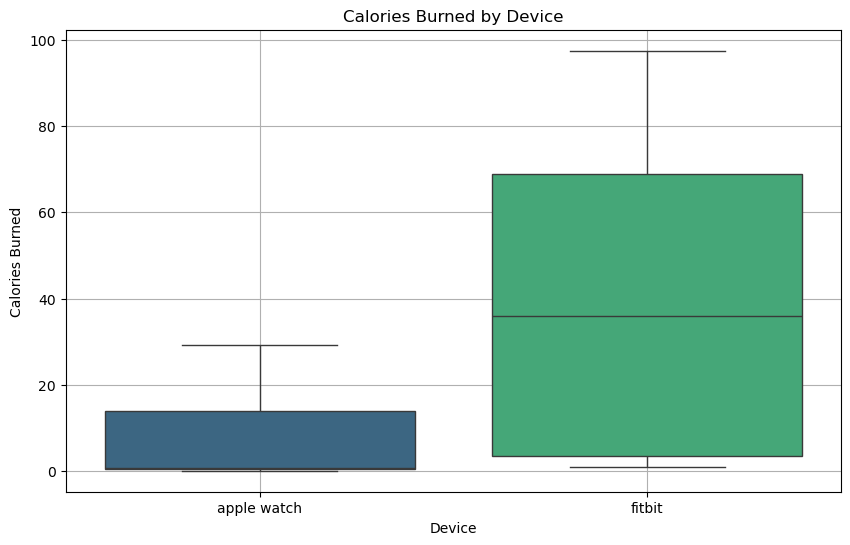

In [87]:
# calories burned using device
calories_device = Apple_fitbit[['calories', 'device']]

# Create the box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='device', y='calories', data=calories_device, palette='viridis')

# Add labels and title
plt.xlabel('Device')
plt.ylabel('Calories Burned')
plt.title('Calories Burned by Device')
plt.grid(True)

# Show the plot
plt.show()

In [89]:
# Box plot analysis: This box plot howerver shows that fitbit users burned more calories than the apple watch users. The data distrbuted we can imply
# that fitbit users burned more calories due to the size of the box plot and where the median is.

In [91]:
#data fram
calories_device = Apple_fitbit[['calories', 'device']]

# Calculate the total calories burned byr each device
total_calories_per_device = calories_device.groupby('device')['calories'].sum()

total_calories = total_calories_per_device.sum()

# Calculate the percentage of total calories burned by each device
percent_calories_per_device = (total_calories_per_device / total_calories) * 100

# Convert to DataFrame for better visuals
percent_calories_df = percent_calories_per_device.reset_index()
percent_calories_df.columns = ['Device', 'Percent of Total Calories']

# Print the percentages
print(percent_calories_df)

        Device  Percent of Total Calories
0  apple watch                  17.336838
1       fitbit                  82.663162


In [93]:
apple_percent = 17.336838
fitbit_percent = 82.663162

# Calculate the difference
percent_difference = apple_percent - fitbit_percent

# Print the result
print(f"The difference in percentage of calories burned between Apple Watch and Fitbit is {percent_difference:.2f}%")

The difference in percentage of calories burned between Apple Watch and Fitbit is -65.33%


In [95]:
# This analysis helps defend our box plot from before depicitng that fitbit users burned 65.33% more calories than apple watch users, even though 
# both genders favor the applewatch we can imply that by picking fitbit as a wearable in the fitness world you will burn significantly more calories 
# than the average apple watch users.


        Device  Mean Intensity Karvonen
0  apple watch                 0.191443
1       fitbit                 0.105064


C:\Users\Daniel\AppData\Local\Temp\ipykernel_30300\3261238042.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Device', y='Mean Intensity Karvonen', data=mean_intensity_df, palette='viridis')


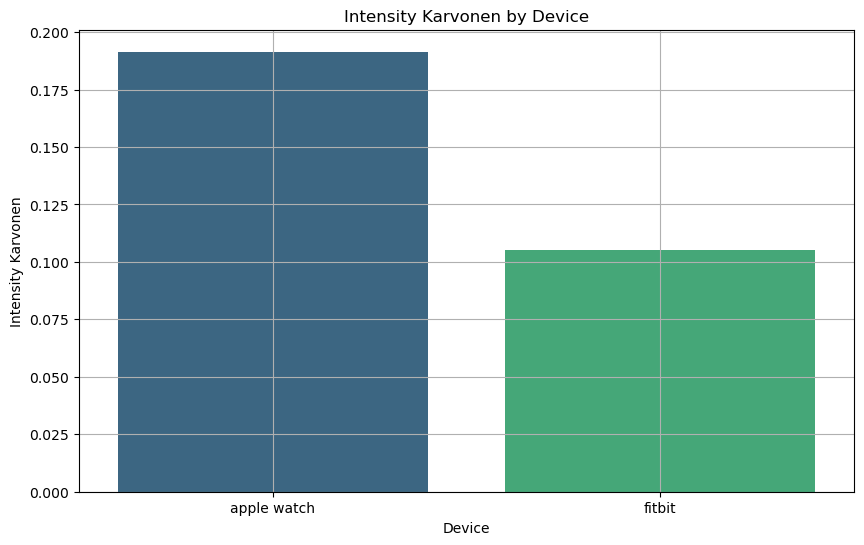

In [99]:
# intensity of device 
# Group by 'device' and calculate the mean of 'intensity_karvonen'
mean_intensity_df = Apple_fitbit.groupby('device')['intensity_karvonen'].mean().reset_index()

# Rename columns
mean_intensity_df.columns = ['Device', 'Mean Intensity Karvonen']

# Print the DataFrame to see means
print(mean_intensity_df)

# Plot the bar graph
plt.figure(figsize=(10, 6))
sns.barplot(x='Device', y='Mean Intensity Karvonen', data=mean_intensity_df, palette='viridis')

# Add labels and title
plt.xlabel('Device')
plt.ylabel('Intensity Karvonen')
plt.title('Intensity Karvonen by Device')
plt.grid(True)

# Show the plot
plt.show()

In [101]:
#bar chart analysis: 

In [103]:
#convert data frame of device and mean of intensity
mean_intensity_df

,Device,Mean Intensity Karvonen
0,apple watch,0.191443
1,fitbit,0.105064


In [105]:
#percenatage of df
mean_intensity_df['Mean Intensity Karvonen (%)'] = mean_intensity_df['Mean Intensity Karvonen'] * 100
mean_intensity_df

,Device,Mean Intensity Karvonen,Mean Intensity Karvonen (%)
0,apple watch,0.191443,19.144307
1,fitbit,0.105064,10.506430


In [107]:
#difference in intensity 
mean_intensity_df = pd.DataFrame({
    'Device': ['Apple Watch', 'Fitbit'],
    'Mean Intensity Karvonen (%)': [19.14, 10.51]
})
#extract the percents from data frame
apple_percent = mean_intensity_df.loc[mean_intensity_df['Device'] == 'Apple Watch', 'Mean Intensity Karvonen (%)'].values[0]
fitbit_percent = mean_intensity_df.loc[mean_intensity_df['Device'] == 'Fitbit', 'Mean Intensity Karvonen (%)'].values[0]

#calculate the difference
watch_dif = apple_percent - fitbit_percent

#print df
print(f"The difference in mean intensity between Apple Watch and Fitbit is {watch_dif:.2f}%")

The difference in mean intensity between Apple Watch and Fitbit is 8.63%
